In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

# Set the paths
photos_path = Path(r"E:\研究生\课程\研一下\互联网信息\project\image_dataset\image_dataset")
features_path = Path(r"E:\研究生\课程\研一下\互联网信息\project\image_dataset\features")

# Read the photos table
# photos = pd.read_csv(unsplash_dataset_path / "photos.tsv000", sep='\t', header=0)

# Load the features and the corresponding IDs
photo_features = np.load(features_path / "features.npy")
photo_ids = pd.read_csv(features_path / "photo_ids.csv")
photo_ids = list(photo_ids['photo_id'])

In [2]:
import clip
import torch

# Load the open CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B-32.pt", device=device)

In [7]:
search_query = "yellow"

with torch.no_grad():
    # Encode and normalize the description using CLIP
    text_encoded = model.encode_text(clip.tokenize(search_query).to(device))
    text_encoded /= text_encoded.norm(dim=-1, keepdim=True)
    
# Retrieve the description vector and the photo vectors
text_features = text_encoded.cpu().numpy()

# Compute the similarity between the descrption and each photo using the Cosine similarity
similarities = list((text_features @ photo_features.T).squeeze(0))

# Sort the photos by their similarity score
best_photos = sorted(zip(similarities, range(photo_features.shape[0])), key=lambda x: x[0], reverse=True)

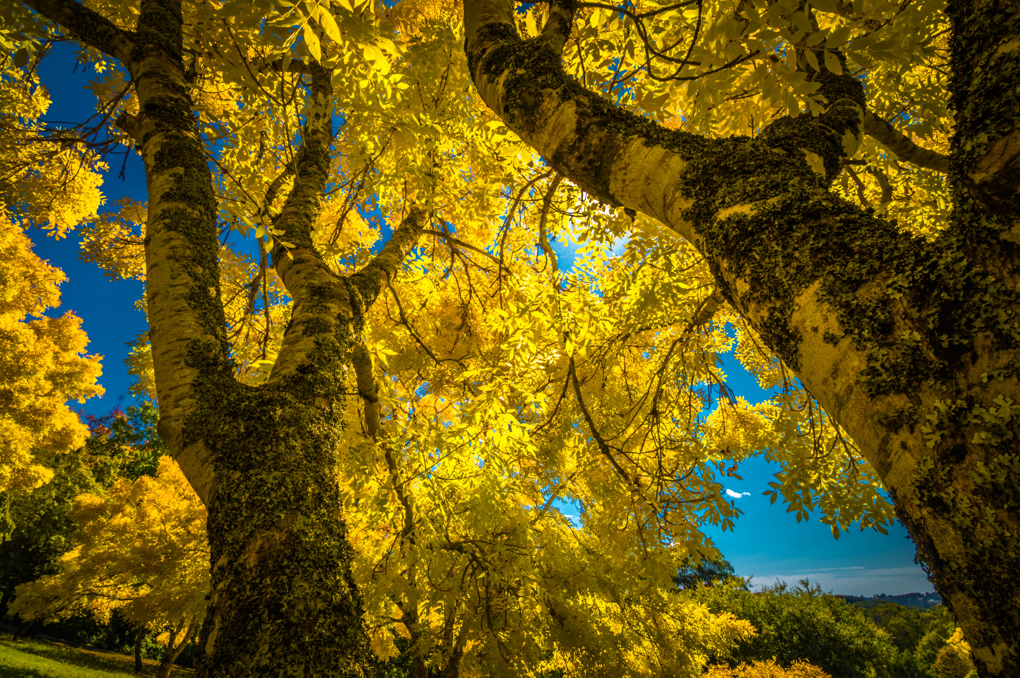

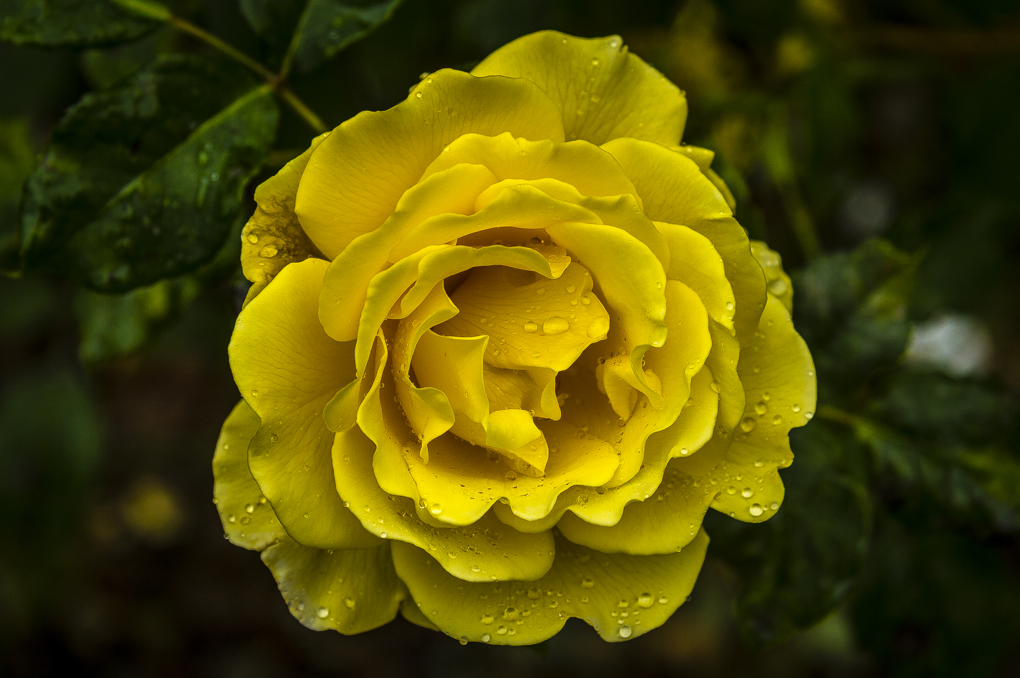

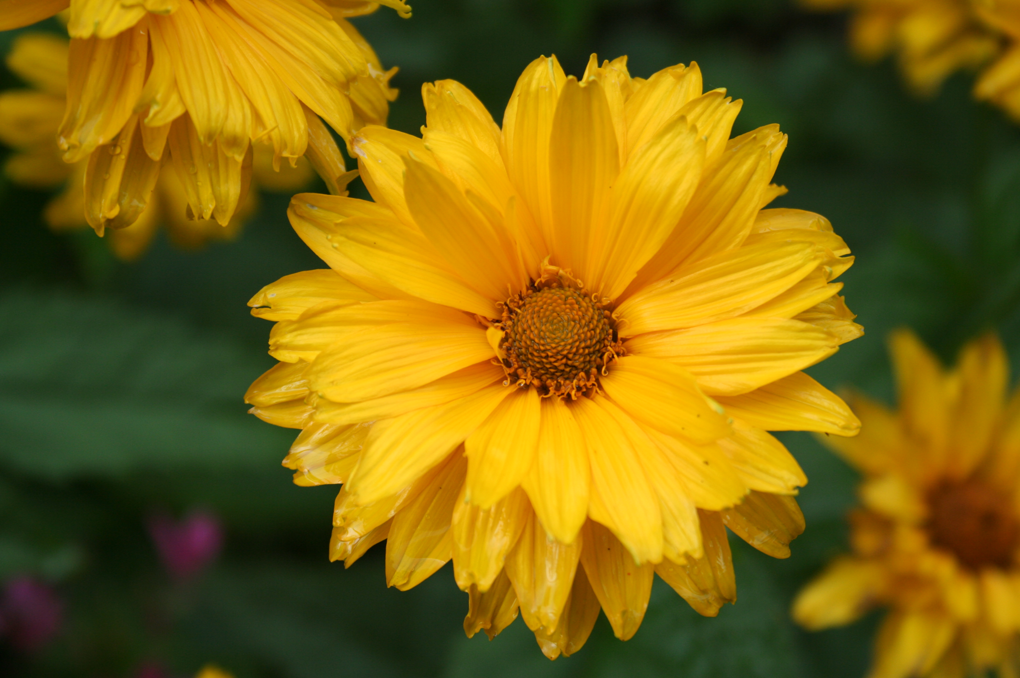

In [8]:
from IPython.display import Image
from IPython.core.display import HTML

# Iterate over the top 3 results
for i in range(3):
    # Retrieve the photo ID
    idx = best_photos[i][1]
    photo_id = photo_ids[idx]

    image_path = "E:\\研究生\\课程\\研一下\\互联网信息\\project\\image_dataset\\image_dataset\\" + photo_id + ".png"
    display(Image(filename= image_path))
    
    # Get all metadata for this photo
    # photo_data = photos[photos["photo_id"] == photo_id].iloc[0]

    # Display the photo
    # display(Image(url=photo_data["photo_image_url"] + "?w=640"))

    # Display the attribution text
    # display(HTML(f'Photo by <a href="https://unsplash.com/@{photo_data["photographer_username"]}?utm_source=NaturalLanguageImageSearch&utm_medium=referral">{photo_data["photographer_first_name"]} {photo_data["photographer_last_name"]}</a> on <a href="https://unsplash.com/?utm_source=NaturalLanguageImageSearch&utm_medium=referral">Unsplash</a>'))
    # print(idx)
    # print(photo_id)